## Testing scipy differential equation solver

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import complex_ode

In [9]:
y0 = [2, 2]

t0 = 0
t1 = 10
dt = 0.001

def f(t, y):
    return [np.sin(t), -y[1]]

In [10]:
n = int((t1 - t0) / dt) + 2

t = np.zeros(n)
t[0] = t0
y = np.zeros((n, 2), dtype=complex)
y[0] = y0

In [11]:
r = complex_ode(f).set_integrator('vode')
r.set_initial_value(y0, t0)

i = 1
while r.successful() and r.t < t1:
    t[i] = r.t + dt
    y[i] = r.integrate(r.t + dt)
    i += 1
    
t = t[:i]
y = y[:i]

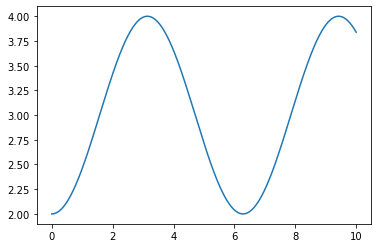

In [13]:
plt.plot(t, y[:, 0].real)
plt.show()

In [99]:
l = 6
#C = np.zeros((l, l), dtype="c16")
C = np.zeros((l, l))
for i in range(0, l, 2):
    vals = (np.random.rand(l // 2) - 0.5)*2
    up = np.zeros(l)
    down = np.zeros(l)
    for j in range(l // 2):
        up[2 * j] = vals[j]
        down[2 * j + 1] = vals[j]
    C[:, i] = up / np.linalg.norm(up)
    C[:, i + 1] = down / np.linalg.norm(down)

In [100]:
C

array([[-0.18,  0.  ,  0.38,  0.  , -0.53,  0.  ],
       [ 0.  , -0.18,  0.  ,  0.38,  0.  , -0.53],
       [ 0.74,  0.  , -0.64,  0.  , -0.61,  0.  ],
       [ 0.  ,  0.74,  0.  , -0.64,  0.  , -0.61],
       [-0.65,  0.  , -0.66,  0.  ,  0.59,  0.  ],
       [ 0.  , -0.65,  0.  , -0.66,  0.  ,  0.59]])

In [91]:
C = C + np.eye(l) * 2
for i in range(l):
    C[:, i] = C[:, i] / np.linalg.norm(C[:, i])

In [98]:
np.sum(C[6,:]**2)

(0.732764954338888+0j)

f(t) = sin^2(pi t / T) * e0 * sin(w t)